In [187]:
import utils
import matplotlib.pyplot as plt
import importlib
import numpy as np
importlib.reload(utils)

<module 'utils' from '/Users/antonio/Dropbox/BSL/CRSMEX/Dendrograms/2020AGO07/scripts/utils.py'>

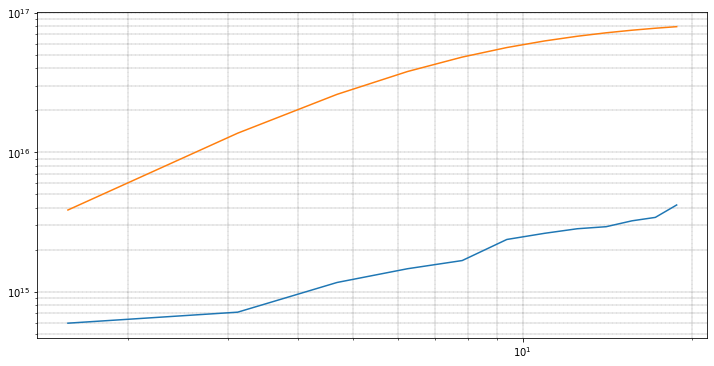

In [191]:
fd = np.load('./Brune_Test/f_test.npy')
Bd = np.load('./Brune_Test/B_test.npy')
typ = 'ACC'

fig, ax = plt.subplots(1,1, figsize = (12,6))
ax.loglog(fd,Bd)
#ax.semilogy(fd,np.power(10,utils.brune_log(fd, 13.0,2, typ)))
ax.loglog(fd,np.power(10,utils.brune_log(fd, 13.62,7.47, typ)))
#ax.semilogy(fd,np.power(10,utils.brune_log(fd, 14.3,3, typ))) # DISP
ax.grid(b=True, which='major', color='k', linestyle='--',linewidth=0.25)
ax.grid(b=True, which='minor', color='k', linestyle='--',linewidth=0.25)


Mt:  14.24
ft:  0.551020408163


<ipython-input-192-e876c7a1c642>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pos=ax.pcolormesh(ft,Mt, Sol,cmap='Reds_r')


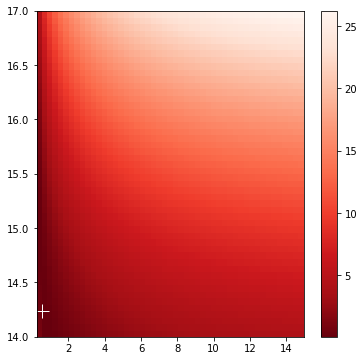

In [192]:
Mt  = np.linspace(np.round(np.log10(np.mean(Bd)))-1, np.round(np.log10(np.mean(Bd)))+2, 51)
ft  = np.linspace(0.25,15,50)
m   = len(Mt)
n   = len(ft)
Sol = np.zeros((m,n))
N   = len(Bd)

for k, M0 in enumerate(Mt):
    for l, f_t in enumerate(ft):
        Bm       = utils.brune_log(fd, M0,f_t, typ)
        error    = np.sum((Bm - np.log10(Bd))**2/(N-1))
        Sol[k,l] = error

result           = np.where(Sol == np.amin(Sol))
listOfCordinates = list(zip(result[0], result[1]))        
M_0 = Mt[listOfCordinates[0][0]]
f_c = ft[listOfCordinates[0][1]]

print('Mt: ',M_0)
print('ft: ',f_c)

fig, ax = plt.subplots(1,1, figsize = (6,6))
pos=ax.pcolormesh(ft,Mt, Sol,cmap='Reds_r')
ax.plot(f_c,M_0,'w+',markersize=14)
fig.colorbar(pos, ax=ax)

In [186]:

listOfCordinates


[(3, 0)]

11